# Clustering

This section tries to cluster the different politicians based on their written words recieved from the data cleaning. The hypothesis is that the candidates will cluster together with their colleagues from their own party, but a fun tendency could be the exact opposite. 

## Data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [19]:
df_politicians = pd.read_csv("Data/similarity_scores_minhash_all_included.csv")
df_politicians.set_index("Unnamed: 0", inplace=True)
df_politicians.index.name = None
df_politicians

,magnus_heunicke,nicolai_wammen,mattias_tesfaye,jakob_ellemann,soren_gade,sophie_lohde,lars_lokke,jakob_engel_schmidt,monika_rubin,jacob_mark,...,torsten_gejl,morten_messerschmidt,pia_kjarsgaard,peter_kofod,Anders_Bjarklev,Anders_Lund_Madsen,DTU,Michael_Kristiansen,Peter_Mogensen,Selma_Montgomery
magnus_heunicke,1.000000,0.102941,0.202405,0.149425,0.047120,0.149425,0.138520,0.185771,0.244813,0.138520,...,0.121495,0.132075,0.100917,0.107011,0.071429,0.237113,0.232033,0.025641,0.147228,0.071429
nicolai_wammen,0.102941,1.000000,0.119403,0.115242,0.061947,0.096892,0.096892,0.145038,0.107011,0.069519,...,0.075269,0.151631,0.140684,0.134216,0.065719,0.158301,0.142857,0.023891,0.160542,0.045296
mattias_tesfaye,0.202405,0.119403,1.000000,0.158301,0.063830,0.149425,0.145038,0.250000,0.252610,0.121495,...,0.174168,0.183432,0.207243,0.197605,0.038062,0.268499,0.190476,0.020408,0.192843,0.052632
jakob_ellemann,0.149425,0.115242,0.158301,1.000000,0.050788,0.162791,0.207243,0.247401,0.192843,0.136364,...,0.132075,0.138520,0.214575,0.153846,0.048951,0.185771,0.185771,0.025641,0.178782,0.047120
soren_gade,0.047120,0.061947,0.063830,0.050788,1.000000,0.043478,0.027397,0.036269,0.052632,0.032702,...,0.036269,0.052632,0.058201,0.047120,0.025641,0.039861,0.052632,0.006711,0.030928,0.039861
sophie_lohde,0.149425,0.096892,0.149425,0.162791,0.043478,1.000000,0.145038,0.181102,0.178782,0.147228,...,0.147228,0.181102,0.134216,0.115242,0.052632,0.158301,0.147228,0.030928,0.158301,0.034483
lars_lokke,0.138520,0.096892,0.145038,0.207243,0.027397,0.145038,1.000000,0.242236,0.188119,0.129944,...,0.167315,0.149425,0.138520,0.145038,0.054482,0.197605,0.132075,0.016949,0.188119,0.056338
jakob_engel_schmidt,0.185771,0.145038,0.250000,0.247401,0.036269,0.181102,0.242236,1.000000,0.348315,0.160542,...,0.183432,0.239669,0.247401,0.217039,0.061947,0.321586,0.221996,0.027397,0.307190,0.063830
monika_rubin,0.244813,0.107011,0.252610,0.192843,0.052632,0.178782,0.188119,0.348315,1.000000,0.195219,...,0.197605,0.165049,0.214575,0.192843,0.063830,0.351351,0.239669,0.015228,0.244813,0.060071
jacob_mark,0.138520,0.069519,0.121495,0.136364,0.032702,0.147228,0.129944,0.160542,0.195219,1.000000,...,0.132075,0.107011,0.090909,0.111111,0.079137,0.138520,0.134216,0.015228,0.115242,0.036269


In [26]:
parties = list(pd.read_csv("Data/Giant.csv").Party) + ["others"]*6

marker_dic = {'socialdemokratiet' : "$A$",
                'radikale' : "$B$",
                'venstre' : "$V$",
                'alternativet' : "$Å$",
                'moderaterne' : "$M$",
                'enhedslisten' : "$Ø$",
                'sf' : "$S$",
                'liberal_alliance' : "$L$",
                'dansk_folkeparti' : "$O$",
                'danmarksdemokraterne' : "$Æ$",
                'nye_borgerlige' : "$N$",
                'konservative' : "$C$",
                'others' : "$X$"}

d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties]}

scatter_df = pd.DataFrame(d)
scatter_df

,Person,Party,marker
0,magnus_heunicke,socialdemokratiet,$A$
1,nicolai_wammen,socialdemokratiet,$A$
2,mattias_tesfaye,socialdemokratiet,$A$
3,jakob_ellemann,venstre,$V$
4,soren_gade,venstre,$V$
5,sophie_lohde,venstre,$V$
6,lars_lokke,moderaterne,$M$
7,jakob_engel_schmidt,moderaterne,$M$
8,monika_rubin,moderaterne,$M$
9,jacob_mark,sf,$S$


## Hierarchical clustering with affinity being precomputed

In [61]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=12, linkage='complete', affinity='precomputed').fit(df_politicians)

12


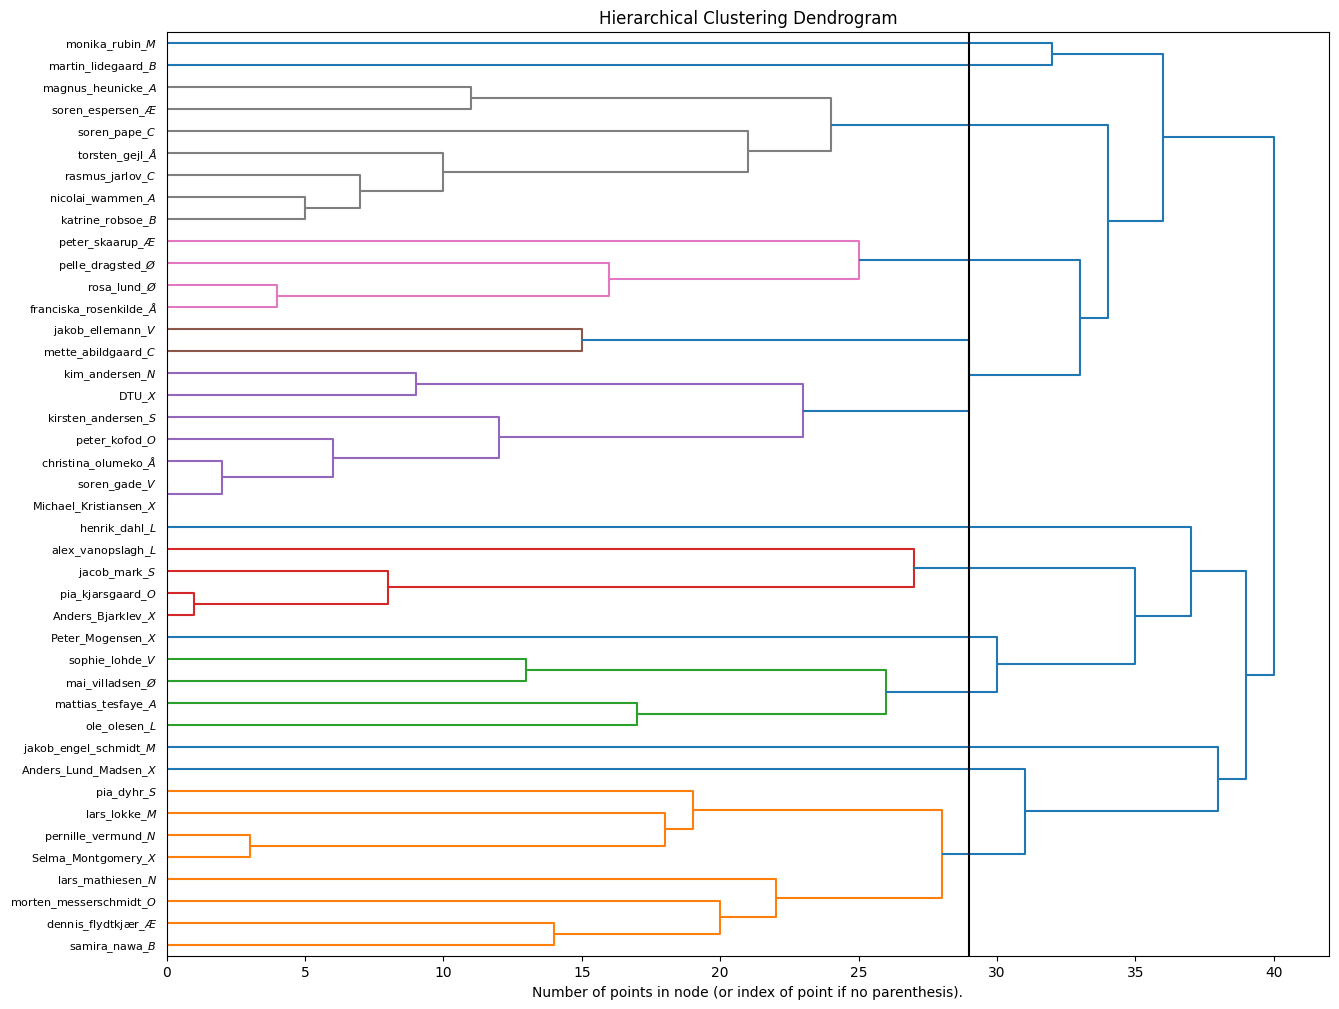

In [85]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distance = np.arange(model.children_.shape[0])

    linkage_matrix = np.column_stack(
        [model.children_, distance, counts]
    ).astype(float)
    print(len(np.unique(fcluster(linkage_matrix, 29, criterion='distance'))))
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


    
plt.figure(figsize=(15, 12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agglo, 
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=29)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axvline(x=29, c='k')
plt.show()

## Hierichal clustering without PCA and with ward distances

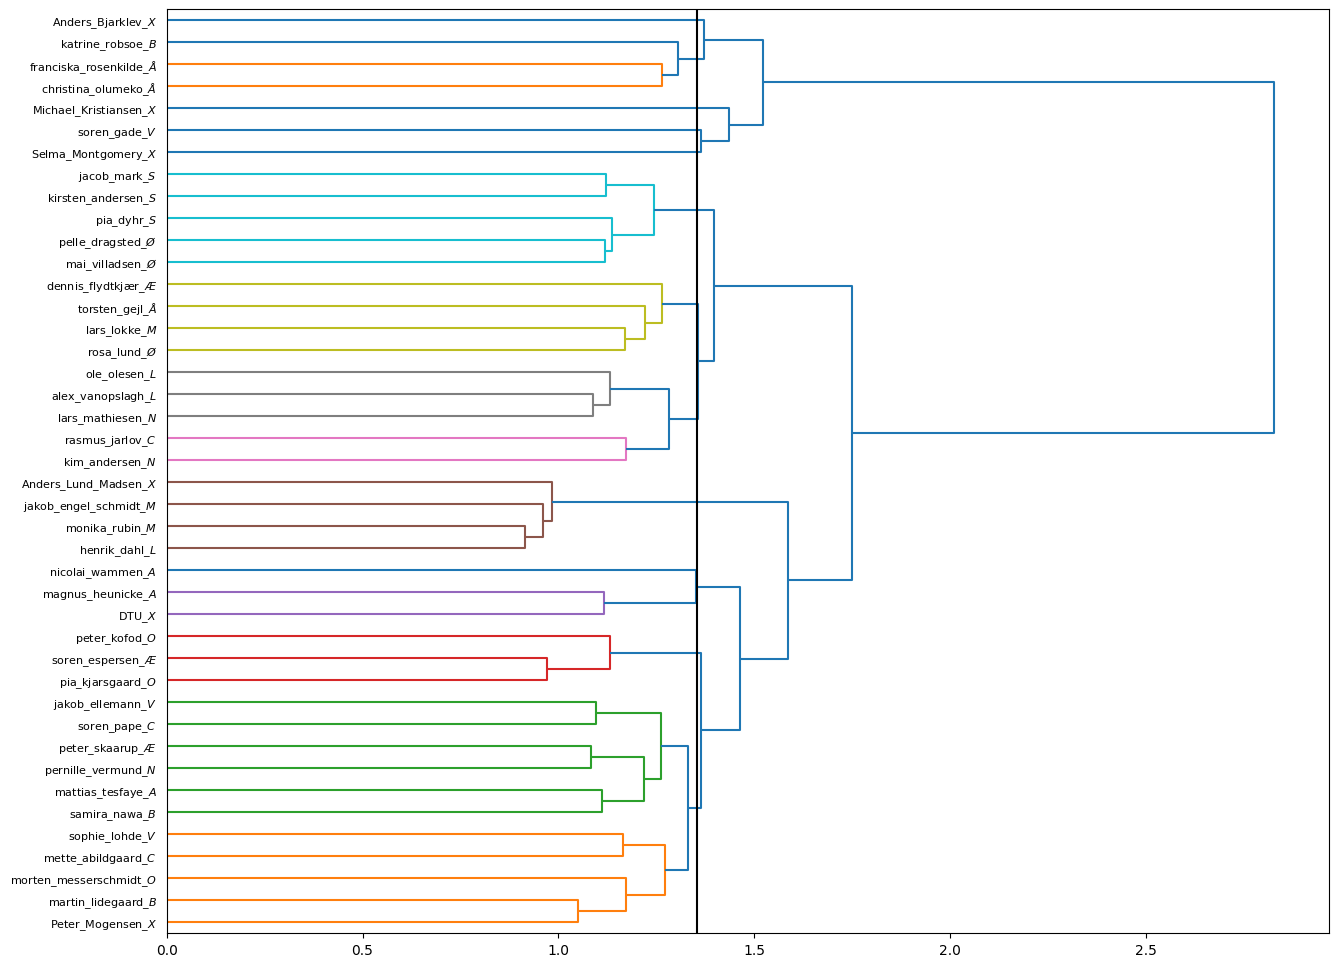

In [66]:
dendo_data = df_politicians
linked = linkage(dendo_data, 'ward')

labelList = df_politicians.index  +"_"+ scatter_df['marker'].values
#labelList = df_politicians['Person'].values

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=1.28
          )
plt.axvline(x=1.354, c='k')
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster
cluster_no_pca = fcluster(linked, 1.354, criterion='distance')

In [40]:
#np.unique(fcluster(linked, 1.354, criterion='distance'))

## Kmeans Clustering with PCA

In [41]:
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df_politicians)

In [42]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(df)
label = kmeans.labels_

In [ ]:
from sklearn.metrics import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=12, linkage='precomputed').fit(df)

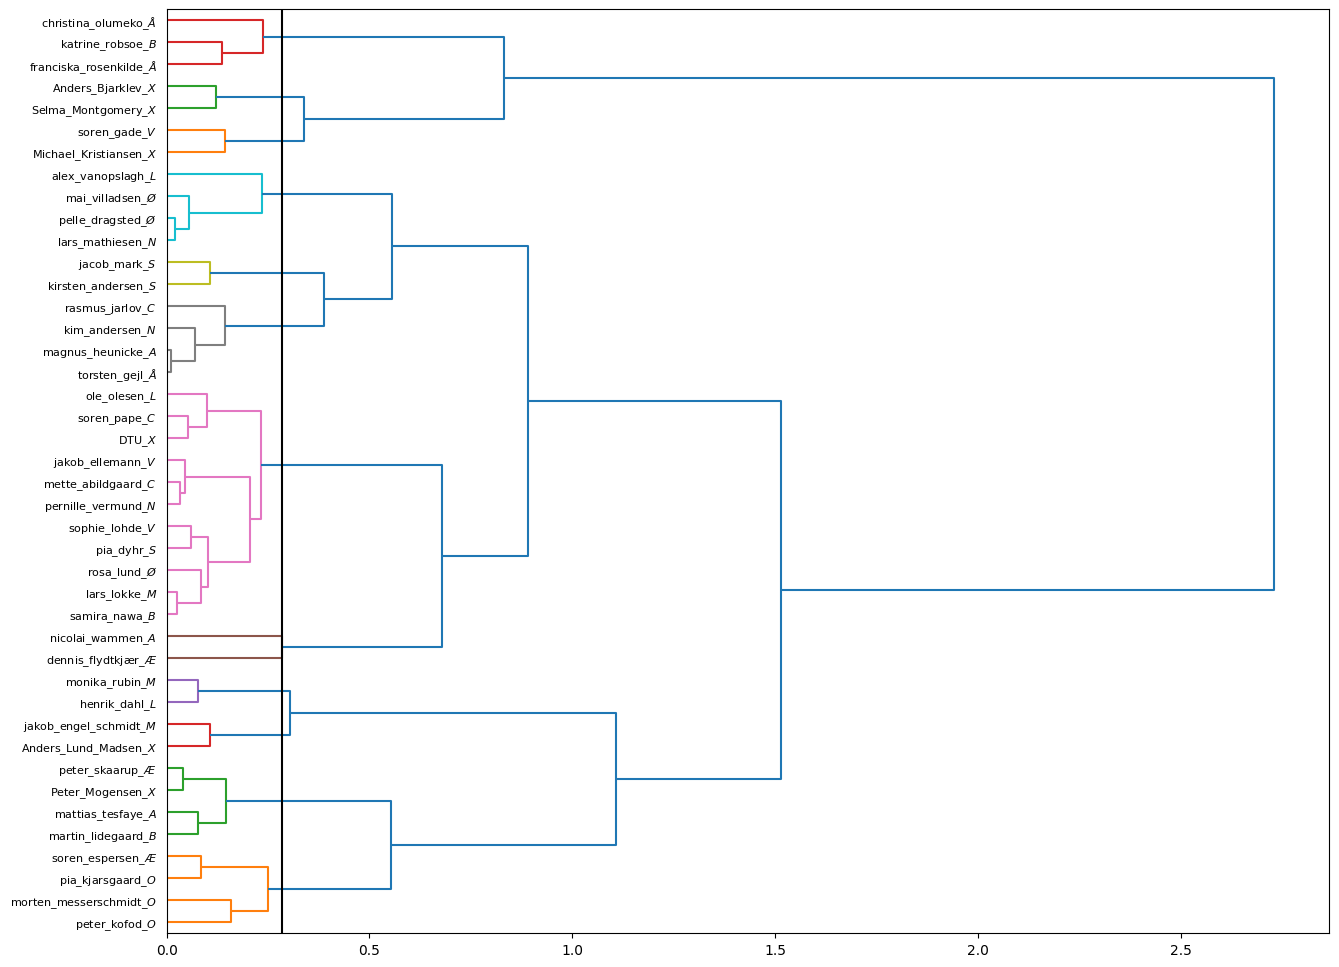

In [43]:
dendo_data = df
linked = linkage(dendo_data, 'ward')

labelList = df_politicians.index +"_"+ scatter_df['marker'].values

plt.figure(figsize=(15, 12))
d = dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False,
            color_threshold=0.285
          )
plt.axvline(x=0.285, c='k')
plt.show()

In [45]:
np.unique(fcluster(linked, 0.285, criterion='distance'))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [46]:
import random

number_of_colors = 12

d_leaf_color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_18051/2293869081.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)


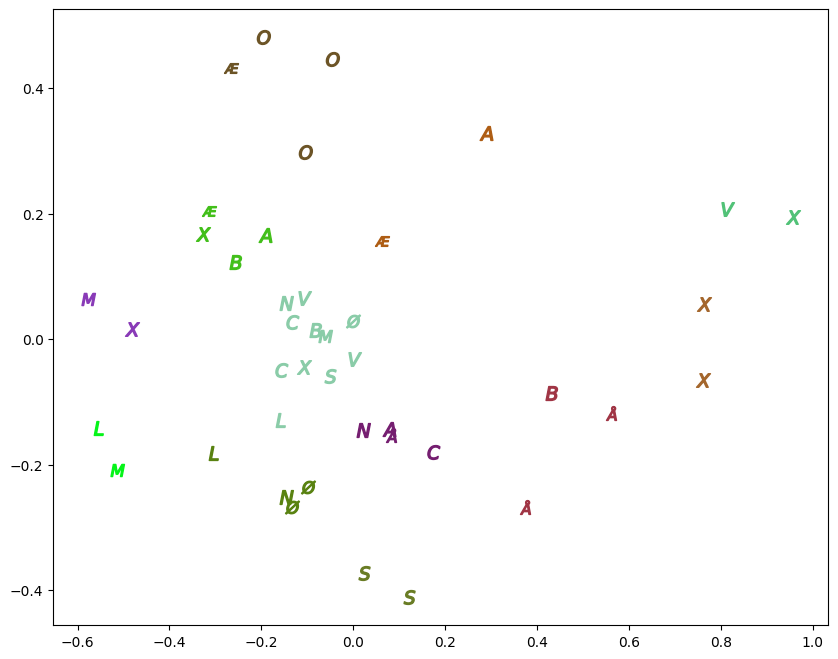

In [47]:
plt.figure(figsize=(10, 8))

points = d['leaves']
colors = ['none'] * len(points)
for xs, c in zip(d['icoord'], d['color_list']):
    for xi in xs:
        if xi % 10 == 5:
            colors[(int(xi)-5) // 10] = c

for point, color in zip(points, colors):
    plt.plot(dendo_data[point, 0], dendo_data[point, 1], 'o', color=d_leaf_color[fcluster(linked, 0.285, criterion='distance')[point] - 1], marker=scatter_df['marker'].values[point], markersize=10)
    #plt.text(dendo_data[point, 0], dendo_data[point, 1], f' {point}')
plt.show()

In [48]:
d = {'Person': df_politicians.index,
     'Party': parties, 
     'marker': [marker_dic[i] for i in parties], 
     'Cluster_nopca': cluster_no_pca, 
     'Cluster_pca': label,
     'pca_point': [df[i] for i in range(len(df))]}

scatter_df = pd.DataFrame(d)
scatter_df

ValueError: All arrays must be of the same length

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

## Heatmap of politicians

<AxesSubplot:>

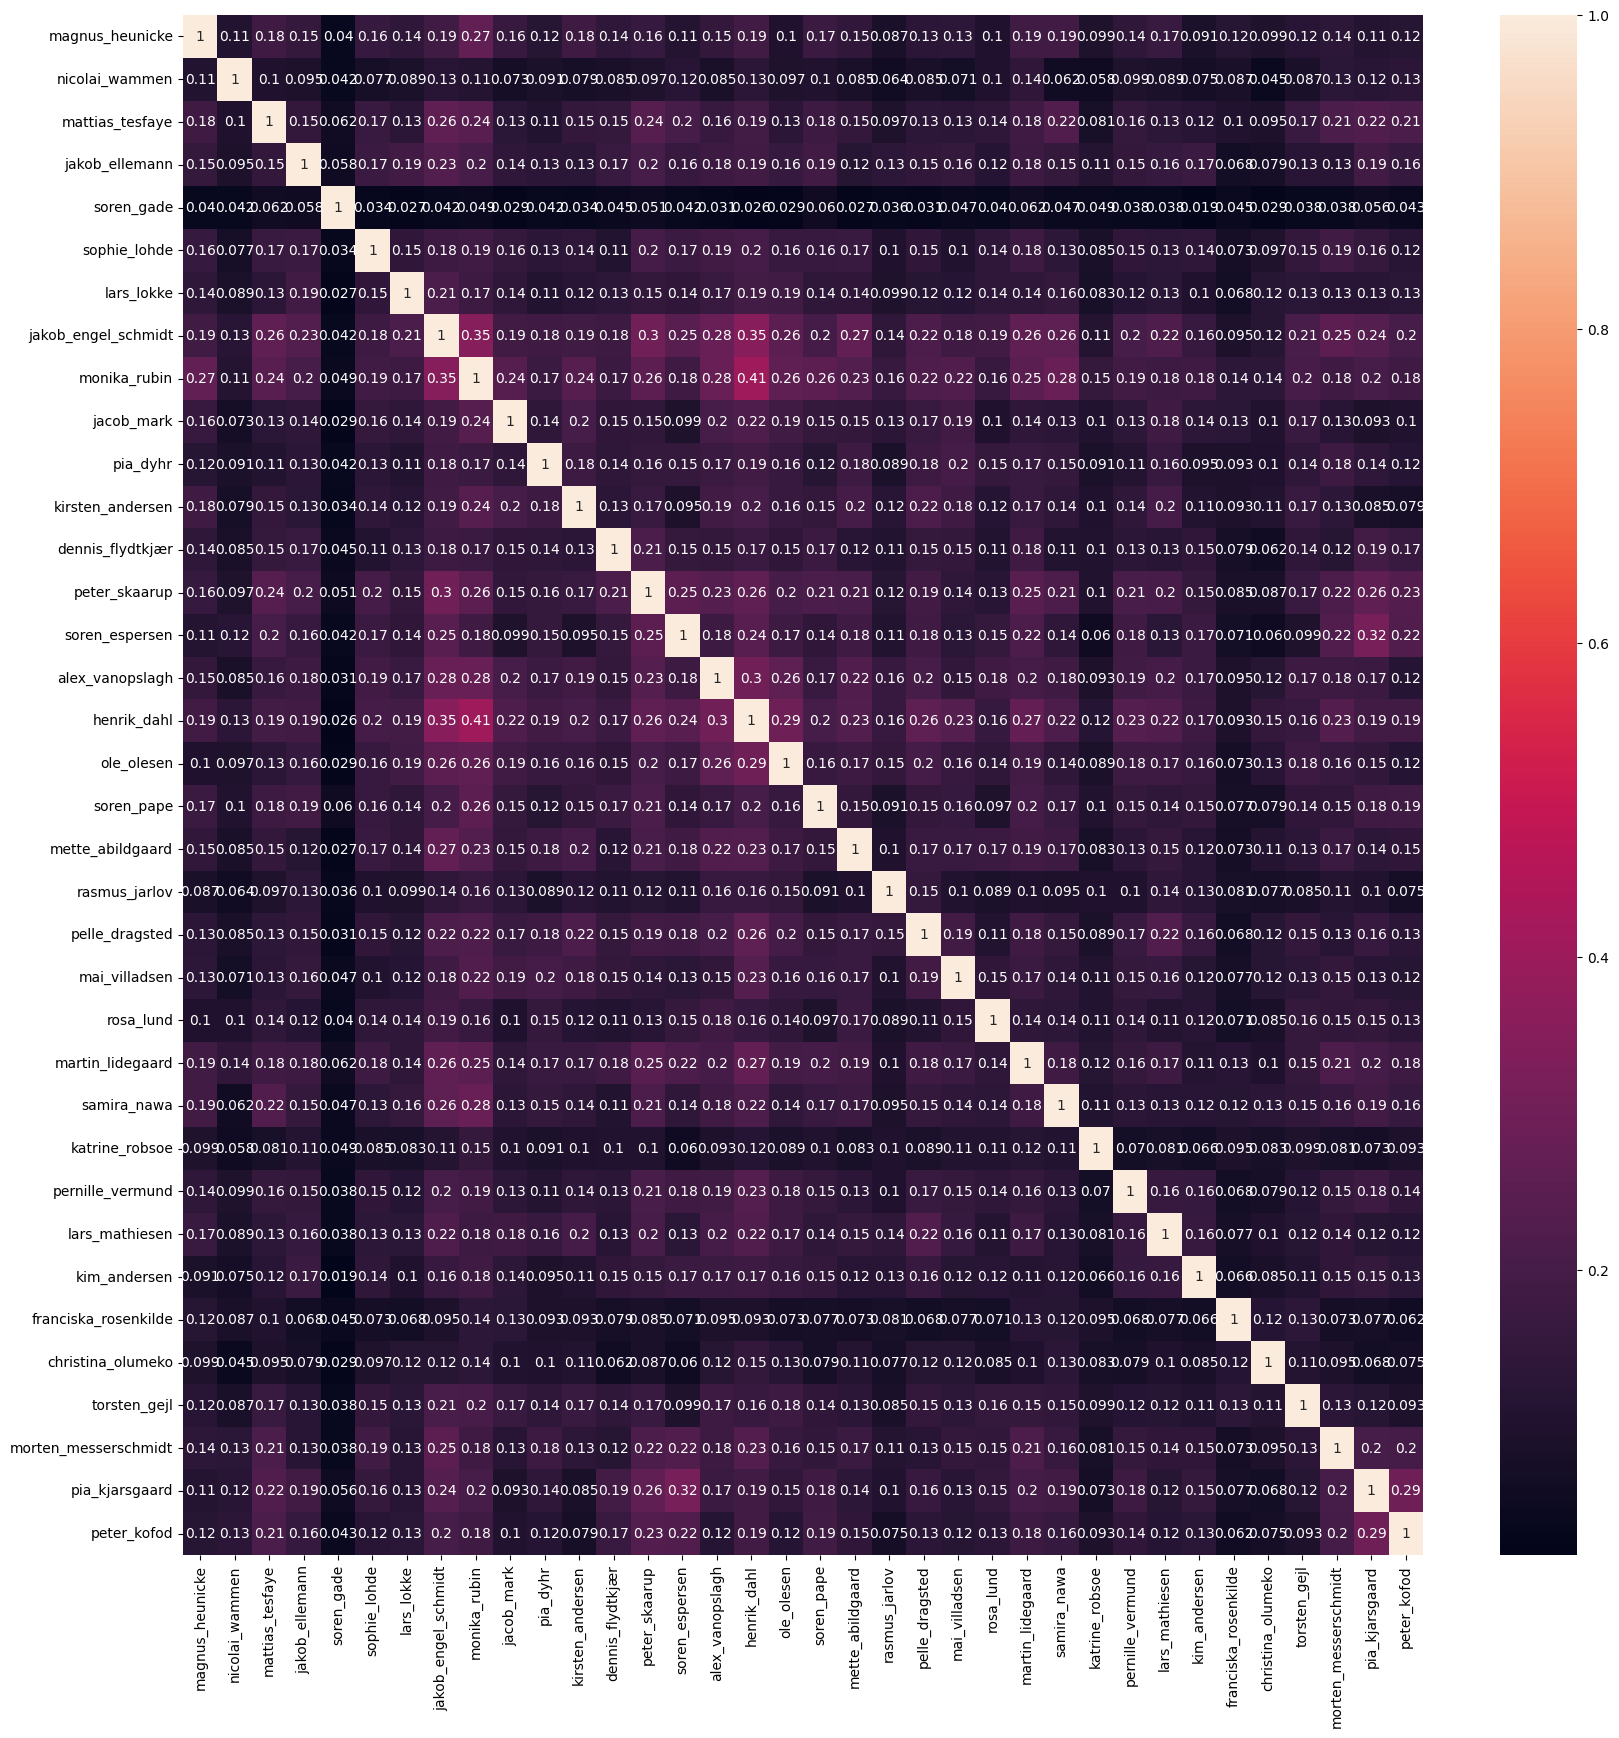

In [17]:
heatmap_data = df_politicians.copy()

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(heatmap_data, ax=ax, xticklabels=True, yticklabels=True, annot=True)
